In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np


In [6]:

# Define the model
class SineNet(nn.Module):
    def __init__(self):
        super(SineNet, self).__init__()
        self.fc1 = nn.Linear(1, 50)  # Input layer
        self.fc2 = nn.Linear(50, 50) # Hidden layer
        self.fc3 = nn.Linear(50, 1)  # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate data
x = torch.unsqueeze(torch.linspace(-4*np.pi, 4*np.pi, 2000), dim=1)
y = torch.sin(x)

# Model, optimizer and loss function
model = SineNet()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()


In [7]:

# Training loop
for epoch in range(2000):
    prediction = model(x)
    loss = criterion(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 0.8276596069335938
Epoch 200, Loss: 0.24259591102600098
Epoch 400, Loss: 0.07177090644836426
Epoch 600, Loss: 0.06763891130685806
Epoch 800, Loss: 0.05233823508024216
Epoch 1000, Loss: 0.04399998113512993
Epoch 1200, Loss: 0.03808618709445
Epoch 1400, Loss: 0.01771489530801773
Epoch 1600, Loss: 0.008198683150112629
Epoch 1800, Loss: 0.004625999368727207


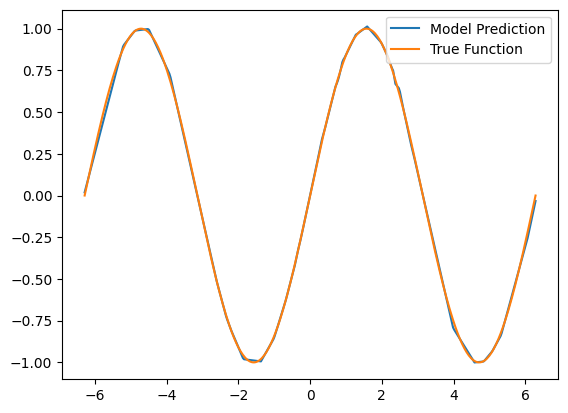

In [8]:

# Test the model
with torch.no_grad():
    test_x = torch.unsqueeze(torch.linspace(-2*np.pi, 2*np.pi, 400), dim=1)
    test_y = model(test_x)
    import matplotlib.pyplot as plt
    plt.plot(test_x.numpy(), test_y.numpy(), label='Model Prediction')
    plt.plot(test_x.numpy(), np.sin(test_x.numpy()), label='True Function')
    plt.legend()
    plt.show()
